<a href="https://colab.research.google.com/github/Jaya9522/EDA_Capstone_Project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##<font color='green'> Play Store App Analysis</font>

### Introduction to data

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
file_path ='/content/drive/MyDrive/Capstone_Project/'
df1 = pd.read_csv(file_path + 'Play Store Data.csv')

In [4]:
#making copy of dataframe
play_store_app = df1.copy()

In [5]:
play_store_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Shape**

In [6]:
play_store_app.shape

(10841, 13)

**Info**

In [7]:
play_store_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#counting the null value across the columns
play_store_app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
play_store_app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Data Cleaning

**Columns**

In [10]:
#we are dealing with these columns
columns_name = play_store_app.columns.to_list()[:11]

In [11]:
text=''
for col in columns_name:
  if ' ' in col:
    col = col.replace(' ','')
    text += col+' '
  else:
    text += col+' '

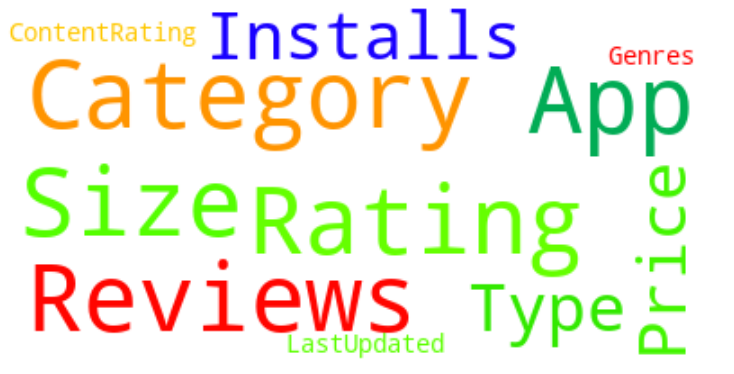

In [12]:
wordcloud = WordCloud(background_color ='white',colormap='prism').generate(text)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 

**Category**

In [13]:
play_store_app['Category'].unique()           #here 1.9 is not category name so,i have to see in which row 1.9 corresponds to

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
play_store_app[play_store_app['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
play_store_app.iloc[10472]                          #here category,rating(should not exceed 5) etc there values are not appropriate
                                                    #so, i used shift method and we can make NaN category value

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [16]:
play_store_app.loc[10472] = play_store_app.loc[10472].shift()
play_store_app.loc[10472,'App'] = play_store_app.loc[10472,'Category']
play_store_app.loc[10472,'Category'] = np.nan                                   

In [17]:
play_store_app.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

**Rating**

In [18]:
play_store_app['Rating'].unique()                                          #here we have to convert the object to numeric

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [19]:
play_store_app['Rating'] = pd.to_numeric(play_store_app['Rating'])

In [20]:
play_store_app['Rating'].unique()   

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [21]:
play_store_app['Rating'].dtype

dtype('float64')

In [22]:
play_store_app.describe()

,Rating
count,9367.000000
mean,4.191513
std,0.515735
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [23]:
mode = play_store_app['Rating'].mode()                           #replacing NaN to mode of rating column           
play_store_app['Rating'].fillna(value=mode[0], inplace=True)

<font color='red'>The mode is the values that appears most often in a set of data</font>

**Reviews**

In [24]:
play_store_app['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [25]:
play_store_app['Reviews'] = play_store_app['Reviews'].astype(float)                 #converting object into float data type

**Size**

In [26]:
play_store_app['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [27]:
def converting_mb_kb(size):                              #converting size megabyte to kilobyte and also object to float
  if 'Varies with device' in size:
    return np.nan

  elif 'M' in size:
    size = size.replace('M','000')
    return eval(size)

  elif 'K' in size:
    size = size.replace('K','')
    return eval(size)


In [28]:
play_store_app['Size'] = play_store_app.apply(lambda x : converting_mb_kb(x['Size']), axis=1)

In [29]:
play_store_app['Size'].dtype

dtype('float64')

**Installs**

In [30]:
play_store_app['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
def removing_plus_comma_from_string(installs):                                 #remoing + and , from the string
  if '+' in installs:
    installs = installs.replace('+','')
  if ',' in installs:
    installs = installs.replace(',','')

  return installs  

In [32]:
play_store_app['Installs'] = play_store_app.apply(lambda x :removing_plus_comma_from_string(x['Installs']), axis=1)

In [33]:
play_store_app['Installs'] = play_store_app['Installs'].astype(float)         #converting object to float

**Price**

In [34]:
play_store_app['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [35]:
#str can be used to access the values of the series as strings and apply several methods to it
play_store_app['Price'] = play_store_app['Price'].str.replace('$','').astype(float)   #removing $ from string and convert into float

**Last Updated**

In [36]:
play_store_app['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10841, dtype: object

In [37]:
#changing date format
play_store_app['Last Updated'] = pd.to_datetime(play_store_app['Last Updated'],format='%B %d, %Y')

In [38]:
play_store_app['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

**Duplicate app name**

In [39]:
#checking duplicate app name
play_store_app['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [40]:
play_store_app[play_store_app['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407.0,67000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews

In [41]:
play_store_app[play_store_app['App'] == 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up


As we can see from the above dataframe,ESPN app is having identical rows with difference in number of reviews and we have to remove those row which has identical reviews

In [42]:
play_store_app.drop_duplicates(inplace=True)

In [43]:
play_store_app[play_store_app['App'] == 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081.0,NaN,10000000.0,Free,0.0,Everyone 10+,Sports,2018-07-19,Varies with device,5.0 and up


### Correlation

In [44]:
#It returns correlation
corr_app = play_store_app.corr()

In [45]:
corr_app

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.058599,0.045368,0.039401,-0.018768
Reviews,0.058599,1.000000,0.232175,0.634998,-0.009416
Size,0.045368,0.232175,1.000000,0.166168,-0.023114
Installs,0.039401,0.634998,0.166168,1.000000,-0.011146
Price,-0.018768,-0.009416,-0.023114,-0.011146,1.000000


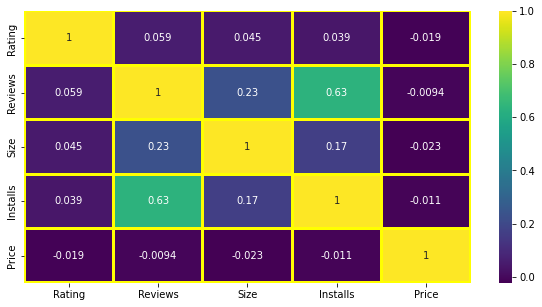

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_app, annot=True, linewidths=2,linecolor='yellow',cmap='viridis')

From the above heatmap, it can be concluded that installion of app affected by reviews

In [47]:
#It returns number of entries, average of entries, outlier values, standard deviation, minimum and maximum entry.
play_store_app.describe()

,Rating,Reviews,Size,Installs,Price
count,10358.000000,1.035800e+04,8517.000000,1.035800e+04,10358.000000
mean,4.217658,4.058654e+05,20017.891171,1.415639e+07,1.030701
std,0.490138,2.696651e+06,24155.946922,8.023580e+07,16.277843
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.300000,1.000000e+03,0.000000
50%,4.400000,1.678500e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,4.640425e+04,30000.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


### Average reviews across each category

In [48]:
#taking average reviews of each category
app_category = play_store_app.groupby('Category')['Reviews'].mean().round(0).sort_values(ascending=False).reset_index()

In [49]:
app_category[:5]

,Category,Reviews
0,SOCIAL,1905632.0
1,COMMUNICATION,1642824.0
2,GAME,1262745.0
3,PHOTOGRAPHY,634464.0
4,VIDEO_PLAYERS,630744.0


Text(0.5, 1.0, 'Category and Reviews')

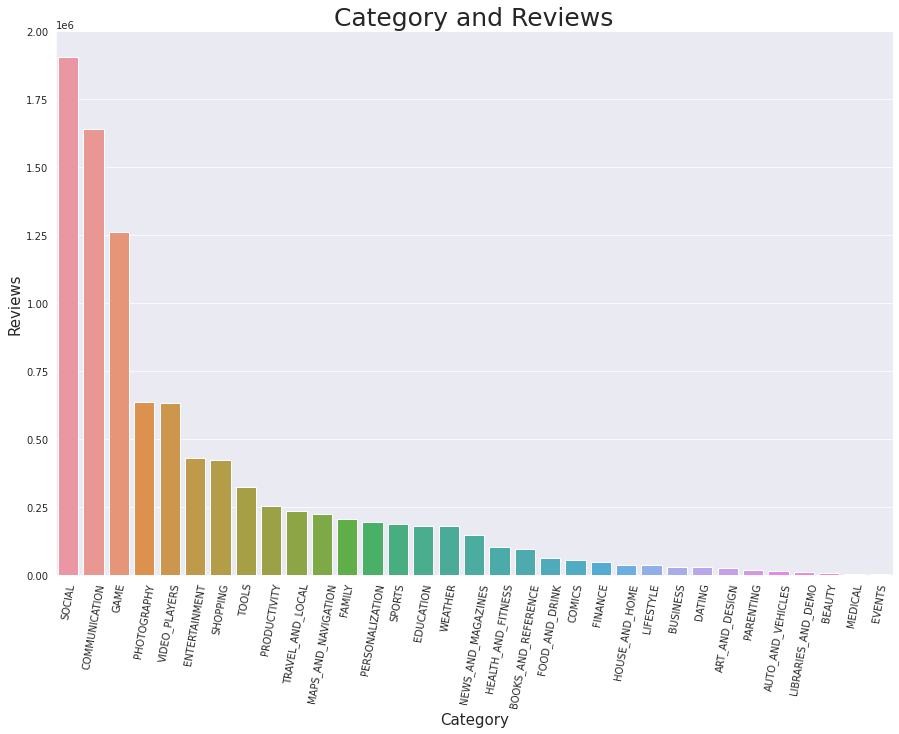

In [50]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=app_category['Category'], y=app_category['Reviews'])
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Reviews", fontsize=15)
plt.title("Category and Reviews", fontsize=25)

### Top app category in play store(Count of apps in each category)

In [51]:
#frequency of app category
top_category = {}
category_list = list(play_store_app['Category'].dropna())
for category in category_list:
  if category in top_category:
    top_category[category] += 1
  else:
    top_category[category] = 1  

In [52]:
#sorting dict by their values
sorted_top_category = dict(sorted(top_category.items(), key=lambda ctg: ctg[1], reverse=True))

In [53]:
category_df = pd.DataFrame(list(sorted_top_category.items()), columns=['Category','Frequency'])

In [54]:
#Top five app-category
category_df[:5]

,Category,Frequency
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408


Text(0.5, 1.0, "Top App's Category In Play Store")

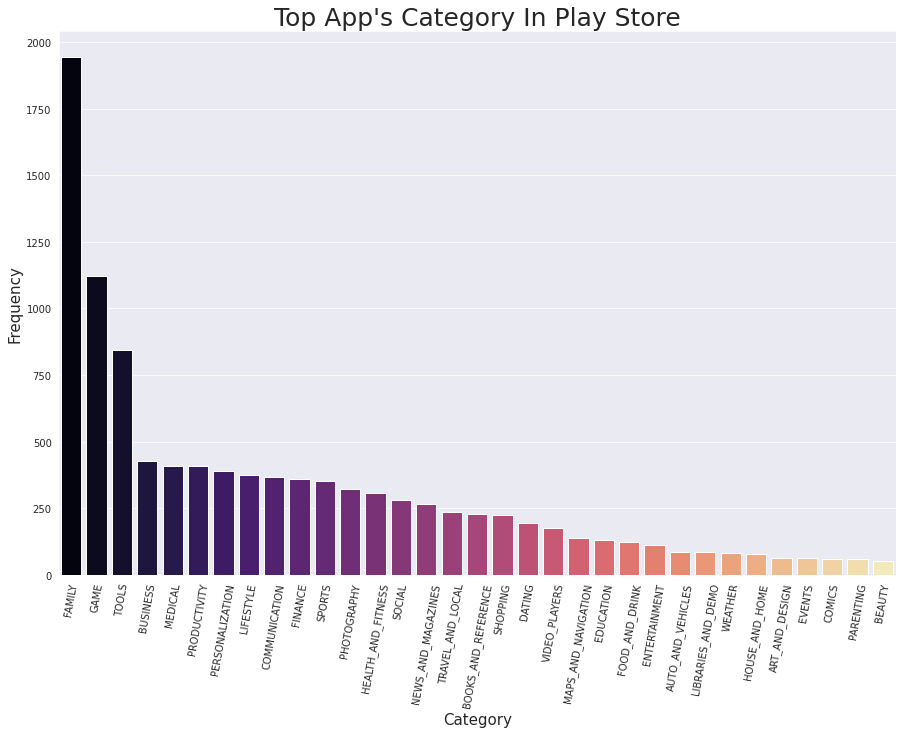

In [55]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=category_df['Category'], y=category_df['Frequency'],palette='magma')
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top App's Category In Play Store", fontsize=25)

### App installed according to category(Number of Installed applications for each category)

In [56]:
#app_category_installs = play_store_app.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=False).reset_index()
app_category_installs = play_store_app.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

In [57]:
app_category_installs[:5]

,Category,Installs
0,GAME,3.154402e+10
1,COMMUNICATION,2.415228e+10
2,SOCIAL,1.251387e+10
3,PRODUCTIVITY,1.246309e+10
4,TOOLS,1.145277e+10


Text(0.5, 1.0, 'Category and Install')

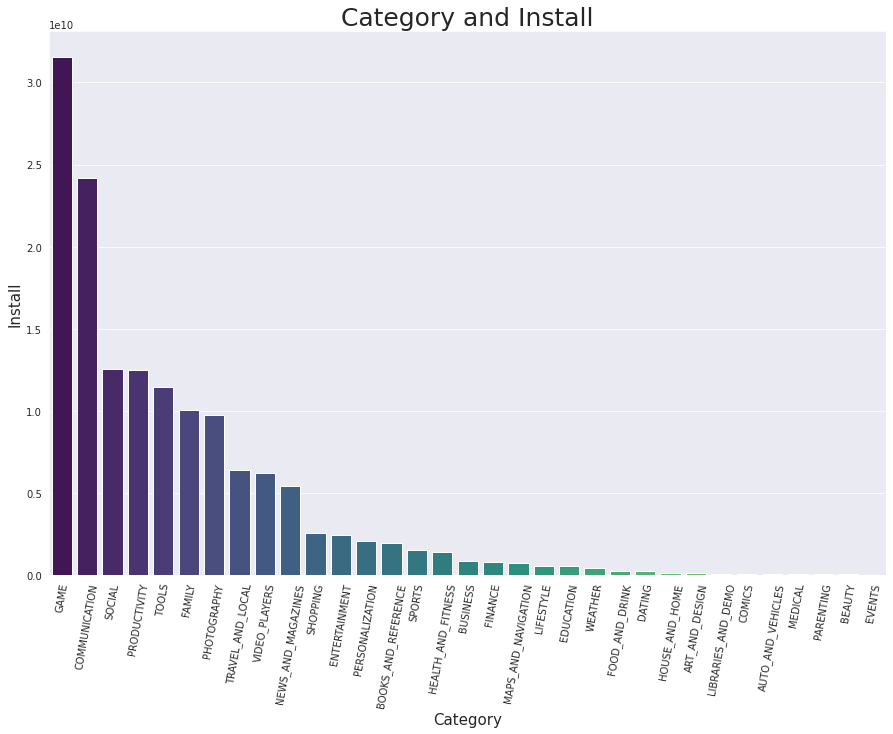

In [58]:
# visualization
plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=app_category_installs['Category'], y=app_category_installs['Installs'], palette= "viridis")
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Install", fontsize=15)
plt.title("Category and Install", fontsize=25)

As we can see from the above two plots: Maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games,Communication and Social Category

### Top app genres in play store(Count of apps in each genres)

In [59]:
#frequency of app category
top_genres = {}
genres_list = list(play_store_app['Genres'].dropna())
for genres in genres_list:
  if genres in top_genres:
    top_genres[genres] += 1
  else:
    top_genres[genres] = 1  

In [60]:
#sorting dict by their values
sorted_top_genres = dict(sorted(top_genres.items(), key=lambda genr: genr[1], reverse=True))

In [61]:
genres_df = pd.DataFrame(list(sorted_top_genres.items()), columns=['Genres','Frequency']).head(25)

In [62]:
genres_df[:5]

,Genres,Frequency
0,Tools,842
1,Entertainment,588
2,Education,527
3,Business,427
4,Medical,408


Text(0.5, 1.0, "Top App's Genres In Play Store")

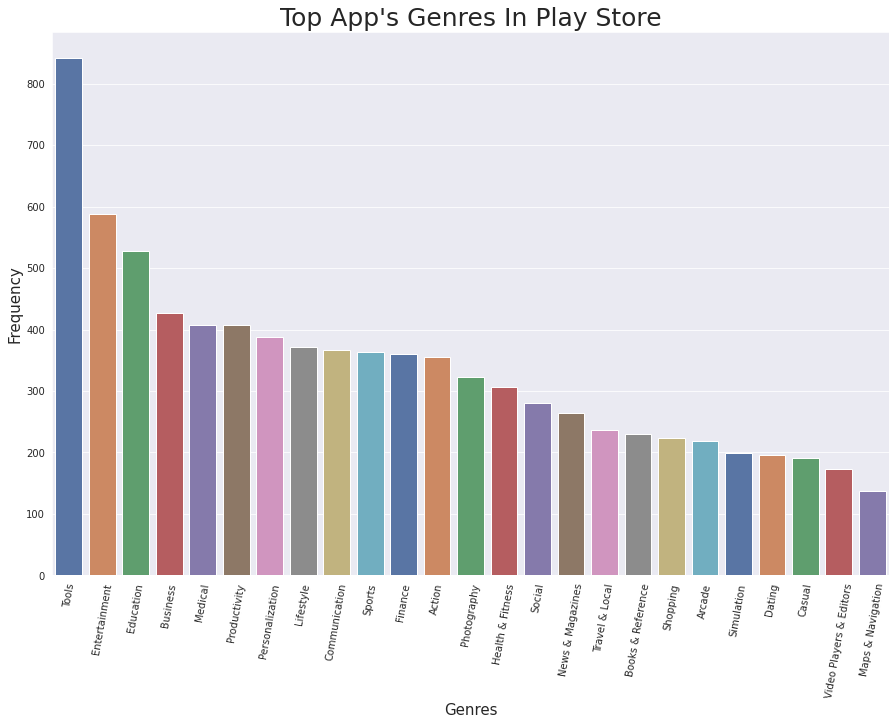

In [63]:
# visualization
plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=genres_df['Genres'], y=genres_df['Frequency'],palette='deep')
plt.xticks(rotation=80)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top App's Genres In Play Store", fontsize=25)

### App installed according to genres(Number of Installed applications for each genres)


In [64]:
#top ten genres
app_genres_installs = play_store_app.groupby('Genres')['Installs'].sum().sort_values(ascending=False).reset_index().head(10)

In [65]:
app_genres_installs

,Genres,Installs
0,Communication,2.415228e+10
1,Social,1.251387e+10
2,Productivity,1.246309e+10
3,Tools,1.144277e+10
4,Photography,9.721248e+09
5,Arcade,9.717129e+09
6,Casual,8.662831e+09
7,Action,8.336039e+09
8,Travel & Local,6.361787e+09
9,Video Players & Editors,6.207003e+09


Text(0.5, 1.0, 'Install according to genres')

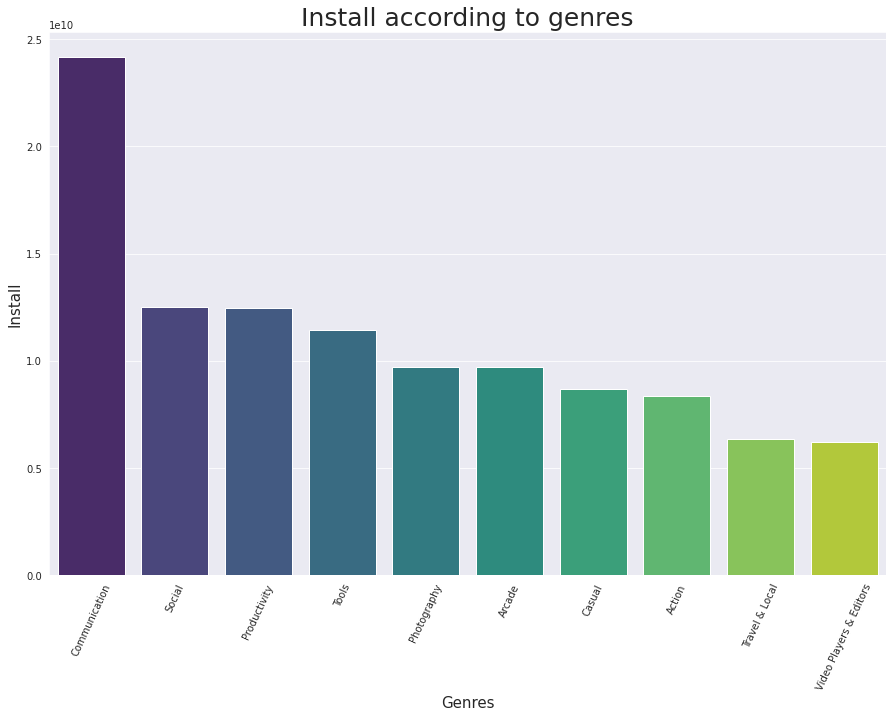

In [66]:
# visualization
plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=app_genres_installs['Genres'], y=app_genres_installs['Installs'], palette= "viridis")
plt.xticks(rotation=65)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Install", fontsize=15)
plt.title("Install according to genres", fontsize=25)

As we can see from the above two plots: Maximum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication,Social and Productivity Genres

### Percentage of Free Vs Paid Apps in Play store

In [67]:
#percentage of paid and free app in play store
# free = play_store_app.loc[play_store_app['Type'] == 'Free','Type'].value_counts()
# paid = play_store_app.loc[play_store_app['Type'] == 'Paid','Type'].value_counts()
app_version = play_store_app['Type'].value_counts(sort=True)
app_levels = play_store_app['Type'].value_counts(sort=True).index

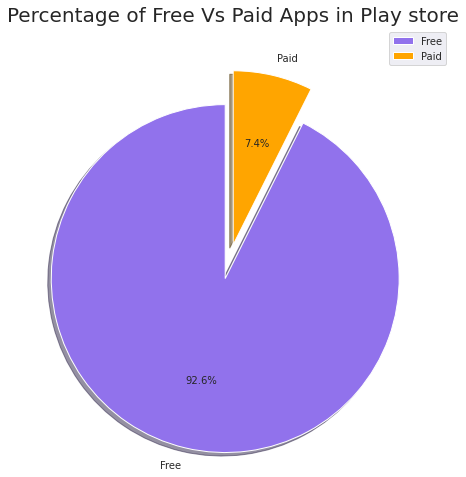

In [68]:
# visualization
plt.figure(figsize=(15,8))
plt.rcParams['figure.figsize'] = (15, 6)
colors = ['#9172EC','orange']
explode = (0.2,0)
plt.pie(app_version, explode=explode, labels=app_levels, colors=colors, autopct='%1.1f%%',shadow=True, startangle = 90)
plt.title('Percentage of Free Vs Paid Apps in Play store',size = 20)
plt.legend()

From the above pie chart, it can be concluded that in the given dataset more number of apps are free

### Content Rating

In [69]:
#frequency of content rating in play store
content_rating_list = list(play_store_app['Content Rating'].dropna())
top_content_rating = {}
for cont_rating in content_rating_list:
  if cont_rating in top_content_rating:
    top_content_rating[cont_rating] += 1
  else:
    top_content_rating[cont_rating] = 1

In [70]:
#sorting dict by their values
sorted_top_content_rating = dict(sorted(top_content_rating.items(), key=lambda ctg: ctg[1], reverse=True))

In [71]:
content_rating_df = pd.DataFrame(list(sorted_top_content_rating.items()), columns=['Content Rating','Count Value'])

In [72]:
#top content rating
content_rating_df

,Content Rating,Count Value
0,Everyone,8383
1,Teen,1146
2,Mature 17+,447
3,Everyone 10+,377
4,Adults only 18+,3
5,Unrated,2


Text(0.5, 0, 'Content Rating')

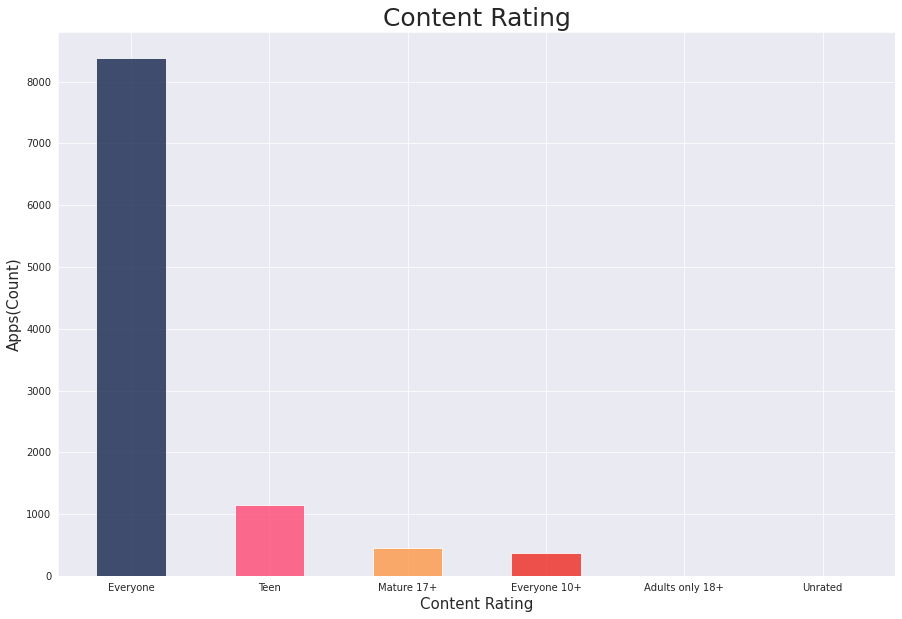

In [73]:
# visualization
plt.figure(figsize=(15,10))
plt.bar(content_rating_df['Content Rating'], content_rating_df['Count Value'], width=0.5, color=['#15244C','#ff4873','#ff9748','#EF2920','#CD202D','#ECC5F2'],alpha=0.8)
plt.title('Content Rating',size = 25)
plt.ylabel('Apps(Count)',fontsize=15)
plt.xlabel('Content Rating', fontsize=15)

Content ratings are used to describe the minimum maturity level of content in apps. However, content ratings don't tell you whether an app is designed for users of a specific age.

Ratings are typically based on a number of factors, including sexual content, violence, drugs, gambling, and profane language.(Source:Google Play Help)

                                                  

### Distribution of App Rating

Text(0.5, 1.0, 'Distribution of Rating')

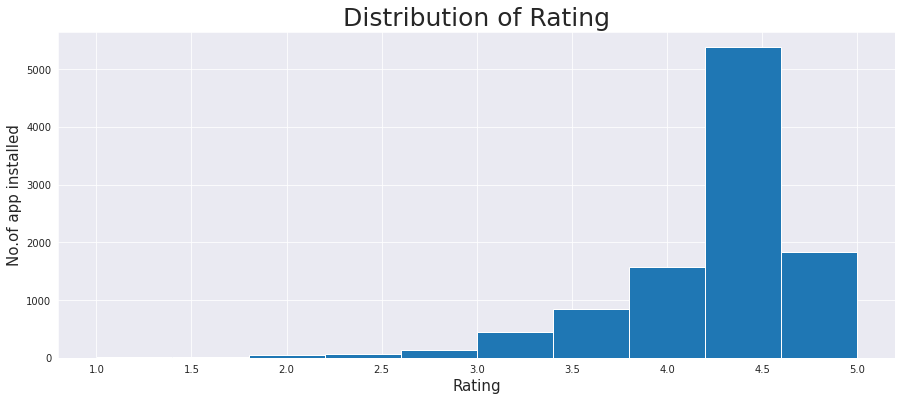

In [74]:
#visualization
#plt.figure(figsize=(15,10))
#graph = sns.kdeplot(play_store_app['Rating'], color="red", shade = True)
plt.hist(play_store_app['Rating'])
plt.xlabel("Rating",fontsize=15)
plt.ylabel("No.of app installed",fontsize=15)
plt.title('Distribution of Rating',size = 25)

From the above histogram, it can be concluded that maximum number of applications installed which has rating lie between 4.2 to 4.5

### Distribution of App Size

Text(0.5, 1.0, 'Distribution of size')

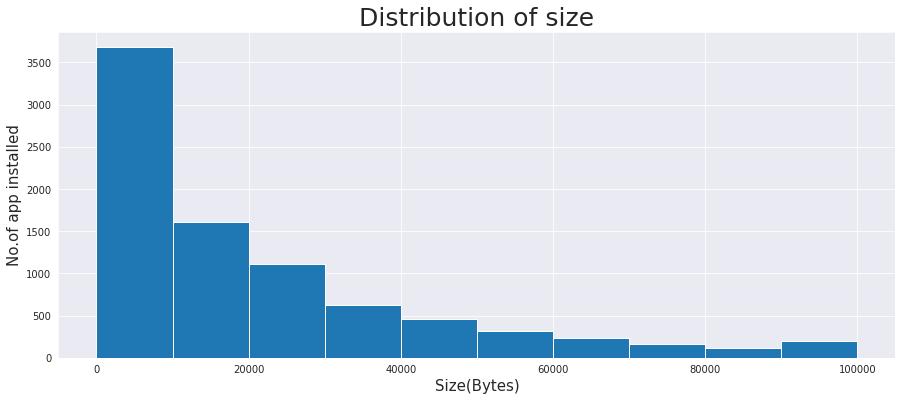

In [75]:
#visualization
plt.hist(play_store_app['Size'])
plt.xlabel("Size(Bytes)",fontsize=15)
plt.ylabel("No.of app installed",fontsize=15)
plt.title('Distribution of size',size = 25)

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size

### Distribution of App Price

Text(0.5, 1.0, 'Distribution of price')

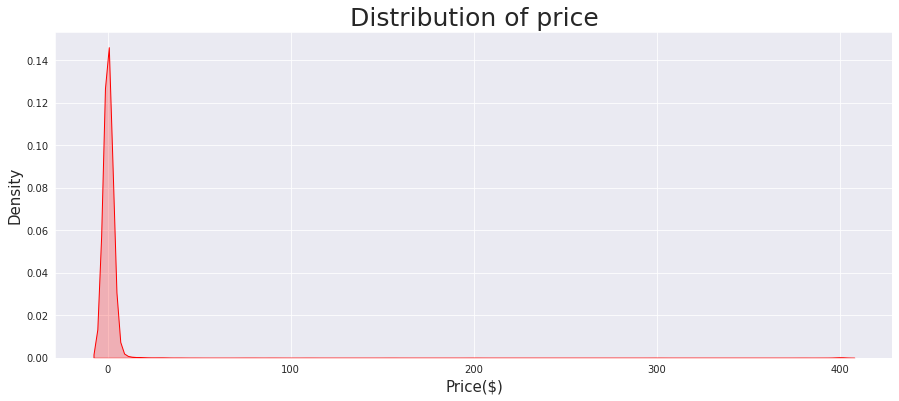

In [76]:
#visualization
graph = sns.kdeplot(play_store_app['Price'], color="red", shade = True)
#plt.hist(play_store_app['Price'])
plt.xlabel("Price($)",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.title('Distribution of price',size = 25)

In [77]:
play_store_app.groupby('Price')['Price'].count()

Price
0.00      9593
0.99       146
1.00         3
1.04         1
1.20         1
          ... 
379.99       1
389.99       1
394.99       1
399.99      12
400.00       1
Name: Price, Length: 92, dtype: int64

From the above kde plot we can say that maximum number of apps are free i.e price = $0 and downloded

### Top Expensive and Earning App in Play Store

In [78]:
#top Expensive app
paid_app = play_store_app[['App','Installs','Price']].sort_values(by='Price', ascending=False)

In [79]:
paid_app.head(10)

,App,Installs,Price
4367,I'm Rich - Trump Edition,10000.0,400.00
4197,most expensive app (H),100.0,399.99
5364,I am rich (Most expensive app),1000.0,399.99
5373,I AM RICH PRO PLUS,1000.0,399.99
5351,I am rich,100000.0,399.99
5354,I am Rich Plus,10000.0,399.99
5369,I am Rich,5000.0,399.99
5359,I am rich(premium),5000.0,399.99
4362,💎 I'm rich,10000.0,399.99
5358,I am Rich!,1000.0,399.99


In [80]:
#top earning app
paid_app['Earning'] = paid_app['Installs'] * paid_app['Price']

In [81]:
top_earning_app = paid_app.sort_values(by='Earning', ascending=False)

In [82]:
#remove duplicate element from app
top_earning_app.drop_duplicates(subset='App',inplace=True)

In [83]:
top_earning_app = top_earning_app.head(10)

In [84]:
top_earning_app

,App,Installs,Price,Earning
4347,Minecraft,10000000.0,6.99,69900000.0
5351,I am rich,100000.0,399.99,39999000.0
5356,I Am Rich Premium,50000.0,399.99,19999500.0
4034,Hitman Sniper,10000000.0,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000.0,6.99,6990000.0
5578,Sleep as Android Unlock,1000000.0,5.99,5990000.0
2883,Facetune - For Free,1000000.0,5.99,5990000.0
8804,DraStic DS Emulator,1000000.0,4.99,4990000.0
4367,I'm Rich - Trump Edition,10000.0,400.00,4000000.0
5354,I am Rich Plus,10000.0,399.99,3999900.0


Text(0.5, 1.0, 'Top Earning App')

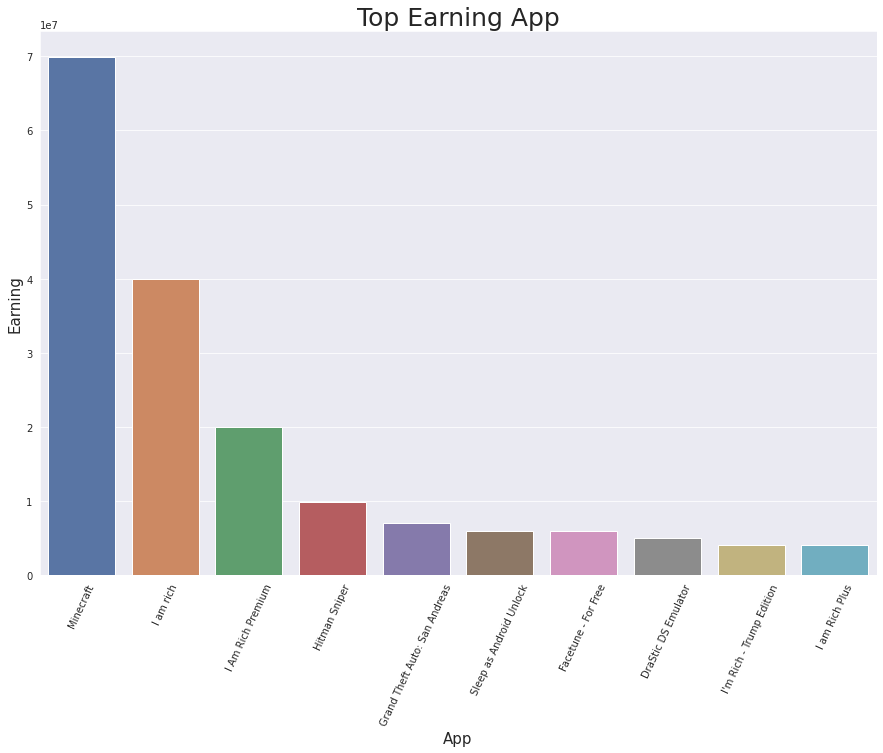

In [85]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=top_earning_app['App'], y=top_earning_app['Earning'], palette= "deep")
plt.xticks(rotation=65)
plt.xlabel("App",fontsize=15)
plt.ylabel("Earning", fontsize=15)
plt.title("Top Earning App", fontsize=25)

### Average Installation of app across the year

In [86]:
#extracting year from date
play_store_app['Year'] = play_store_app.apply(lambda x : x['Last Updated'].year, axis=1)
avg_installtion_year = play_store_app[['Installs','Last Updated','Year']]

In [87]:
avg_installtion_year.head()

,Installs,Last Updated,Year
0,10000.0,2018-01-07,2018
1,500000.0,2018-01-15,2018
2,5000000.0,2018-08-01,2018
3,50000000.0,2018-06-08,2018
4,100000.0,2018-06-20,2018


In [88]:
sorted_avg_installtion = avg_installtion_year.groupby('Year')['Installs'].mean().sort_values(ascending=False).reset_index()

In [89]:
sorted_avg_installtion

,Year,Installs
0,2018,2.026898e+07
1,2017,2.112931e+06
2,2016,1.757244e+06
3,2014,1.322722e+06
4,2011,1.160473e+06
5,2013,9.545034e+05
6,2015,9.194724e+05
7,2012,5.381619e+05
8,2010,1.000000e+05


Text(0.5, 1.0, 'App Installtions Across the Year')

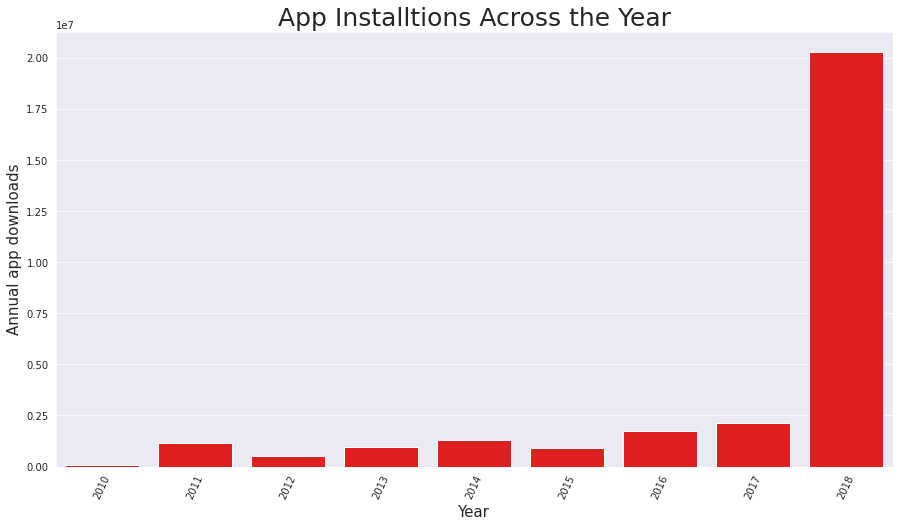

In [90]:
# visualization
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x=sorted_avg_installtion['Year'], y=sorted_avg_installtion['Installs'], color='red')
plt.xticks(rotation=65)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Annual app downloads", fontsize=15)
plt.title("App Installtions Across the Year", fontsize=25)

From the above plot we can say that installation are minimum in 2010 and maximum in 2018 but installation of app increases from 2015 onward

### What are the Top five installed apps in any category

In [91]:
#List of Category
print(list(play_store_app['Category'].dropna().unique()))

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


In [92]:
# def top_five_installed_app(category):
#   ctg = play_store_app[play_store_app['Category'] == category].groupby('App')[['App','Installs']].head(10)
#   return ctg

In [93]:
def top_five_installed_app(category):
  ctg = play_store_app[play_store_app['Category'] == category].sort_values(by='Installs', ascending=False)
  return ctg[['App','Installs']].drop_duplicates(subset='App').head()

In [94]:
top_five_df = top_five_installed_app('NEWS_AND_MAGAZINES')
#top_five_df = top_five_df.sort_values(by='Installs', ascending=False).drop_duplicates(subset='App').head()

In [95]:
top_five_df

,App,Installs
3736,Google News,1.000000e+09
3739,Twitter,5.000000e+08
3755,Flipboard: News For Our Time,5.000000e+08
3729,"Dailyhunt (Newshunt) - Latest News, Viral Videos",5.000000e+07
3795,Newsroom: News Worth Sharing,1.000000e+07


Text(0.5, 1.0, 'Top Five Installed App')

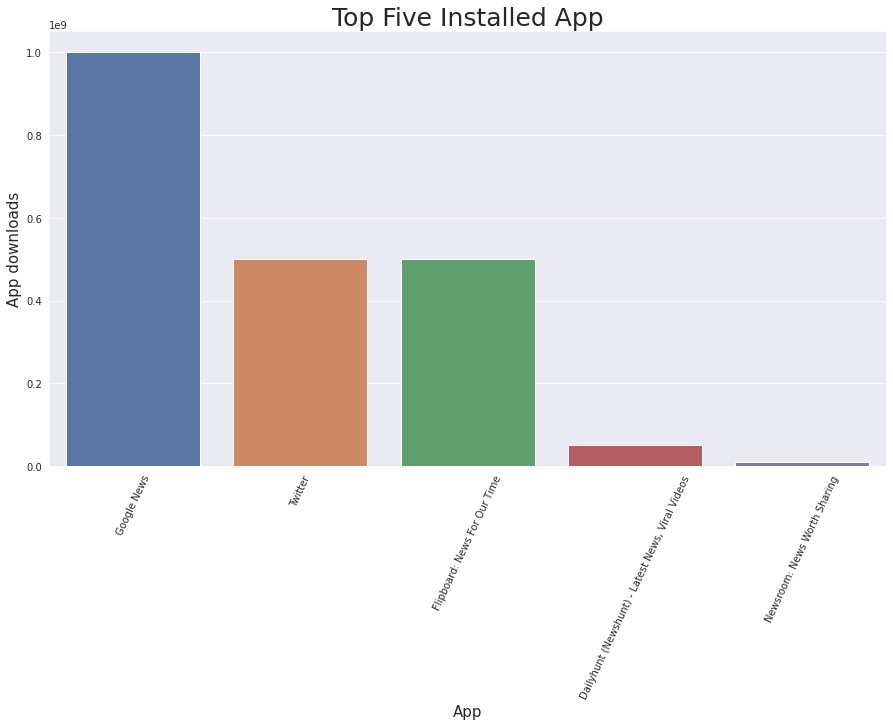

In [96]:
# visualization
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x=top_five_df['App'], y=top_five_df['Installs'],palette='deep')
plt.xticks(rotation=65)
plt.xlabel("App",fontsize=15)
plt.ylabel("App downloads", fontsize=15)
plt.title("Top Five Installed App", fontsize=25)

### How many apps are present in each category accodring to their version(Free/Paid)?

In [97]:
free_paid_app_no = play_store_app.groupby(['Category','Type'])['Type'].count().unstack().fillna(0).sort_values(by='Free',ascending=False).reset_index()

In [98]:
free_paid_app_no.index.names = ['Index']

In [99]:
free_paid_app_no[:5]

Type,Category,Free,Paid
Index,,,
0,FAMILY,1755.0,187.0
1,GAME,1038.0,83.0
2,TOOLS,765.0,78.0
3,BUSINESS,415.0,12.0
4,PRODUCTIVITY,379.0,28.0


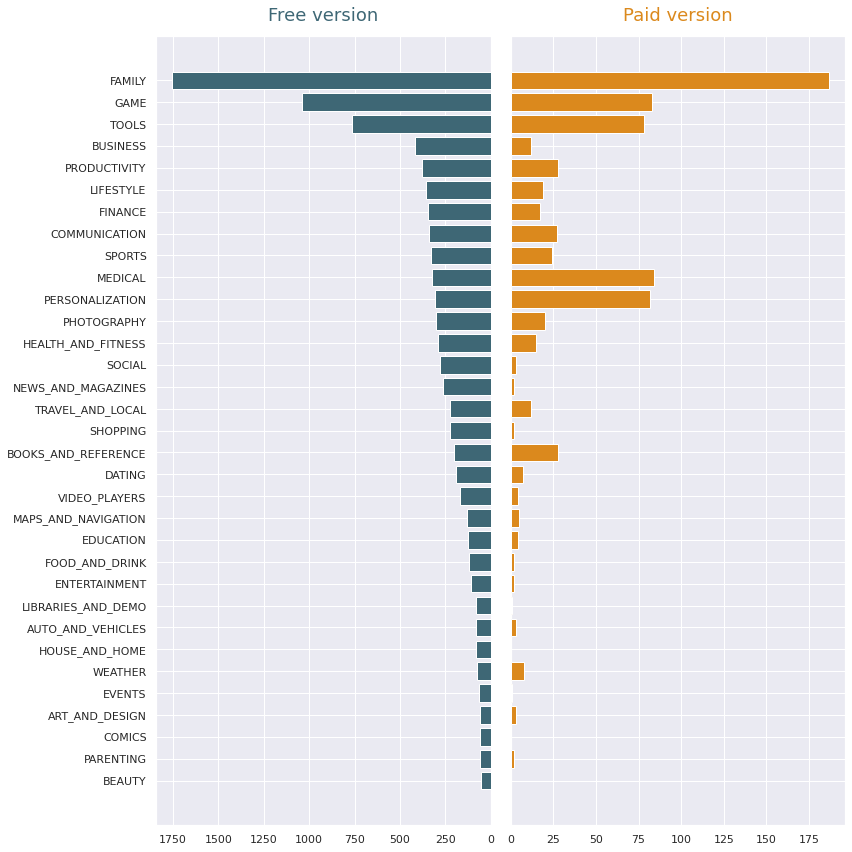

In [100]:
# visualization
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(figsize=(12,12), ncols=2, sharey=True)


axes[0].barh(free_paid_app_no['Category'], free_paid_app_no['Free'], align='center', color='#3e6775', zorder=10)
axes[0].set_title('Free version', fontsize=18, pad=15, color='#3e6775')

axes[1].barh(free_paid_app_no['Category'], free_paid_app_no['Paid'], align='center', color='#db891d', zorder=10)
axes[1].set_title('Paid version', fontsize=18, pad=15, color='#db891d')

axes[0].invert_xaxis()
plt.gca().invert_yaxis()

fig.tight_layout()

### Rating Vs Type

Text(0.5, 1.0, 'Rating Vs Type')

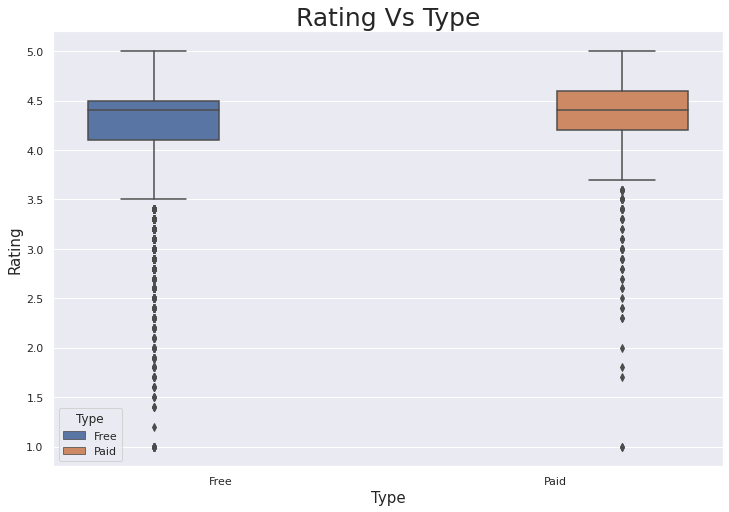

In [101]:
#visualization
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Type', y = 'Rating',hue= 'Type', data=play_store_app)
plt.xlabel("Type",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title('Rating Vs Type',size = 25)

**Conclusion:**
As we can see, paid version apps has rating more as compared to free version apps.so,we can say that most of the users give higher rating for paid version app even it is less downloded(See distribution of app price)




In [102]:
#Calculating rating frquency
rating_freq = play_store_app['Rating'].value_counts().reset_index().rename(columns={'index':'Rating','Rating': 'Frequency'})

In [103]:
rating_freq.sort_values(by='Rating', ascending=False).head(10)

,Rating,Frequency
10,5.0,271
17,4.9,87
12,4.8,228
7,4.7,484
4,4.6,768
2,4.5,977
0,4.4,2497
1,4.3,1016
3,4.2,888
5,4.1,657


## <font color='green'>App Review Analysis</font>

### Introduction to data

In [106]:
file_path ='/content/drive/MyDrive/Capstone_Project/'
df2 = pd.read_csv(file_path + 'User Reviews.csv')

In [107]:
#making copy of dataframe
app_reviews = df2.copy()

In [108]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**Shape**

In [109]:
app_reviews.shape

(64295, 5)

**Info**

In [110]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [111]:
 #calculating null value across the column
app_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [112]:
app_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Merging dataframes on apps

In [113]:
app_review_df = play_store_app.merge(app_reviews, on='App')

In [114]:
app_review_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500,0.600000


we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. 

* **<font color = 'green'>Sentiment</font>** basically determines the attitude or the emotion of the reviewer, i.e., whether it is positive or negative or neutral. 

* **<font color = 'green'>Sentiment Polarity</font>** is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

* **<font color = 'green'>Sentiment Subjectivity</font>** generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].





In [115]:
app_review_df.shape

(100219, 18)

### Correlation

In [116]:
#It returns correlation
app_review_corr = app_review_df[['Rating','Reviews','Size','Installs','Price','Sentiment_Polarity','Sentiment_Subjectivity']].corr()

In [117]:
app_review_corr

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.138675,0.240344,-0.024598,-0.078546,0.046526,0.056037
Reviews,0.138675,1.000000,0.502802,0.405200,-0.027150,-0.112394,-0.018629
Size,0.240344,0.502802,1.000000,0.276975,-0.005026,-0.196169,0.003254
Installs,-0.024598,0.405200,0.276975,1.000000,-0.029153,-0.058208,-0.009491
Price,-0.078546,-0.027150,-0.005026,-0.029153,1.000000,0.024974,0.002845
Sentiment_Polarity,0.046526,-0.112394,-0.196169,-0.058208,0.024974,1.000000,0.230688
Sentiment_Subjectivity,0.056037,-0.018629,0.003254,-0.009491,0.002845,0.230688,1.000000


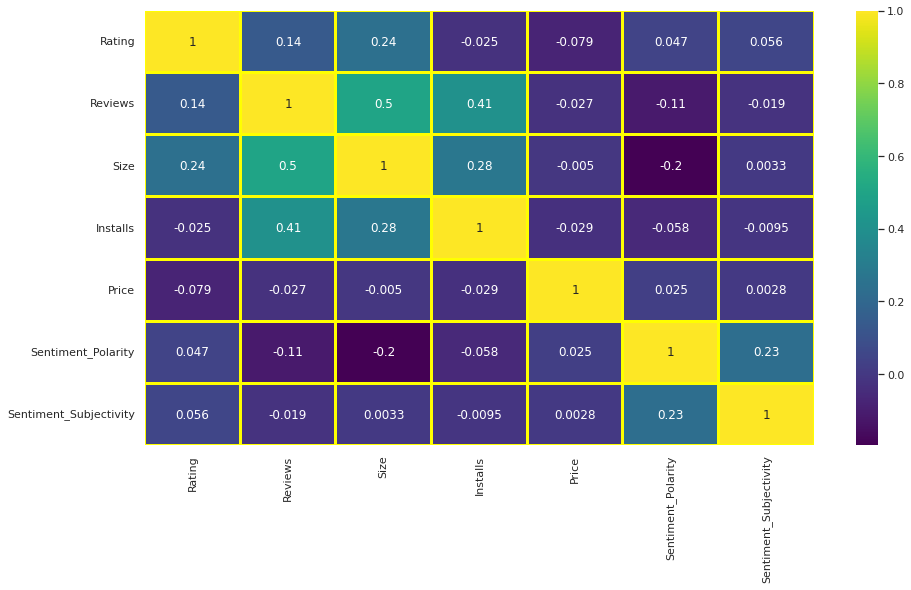

In [118]:
plt.figure(figsize=(15,8))
sns.heatmap(app_review_corr, annot=True, linewidths=2,linecolor='yellow',cmap='viridis')

### Distribution of Sentiment Subjectivity

Text(0.5, 1.0, 'Distribution of Subjectivity')

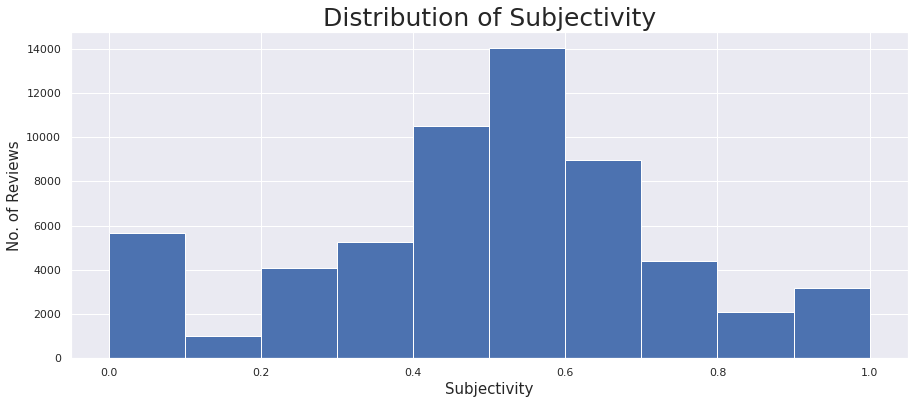

In [119]:
#visualization
plt.hist(app_review_df.loc[~app_review_df['Sentiment_Subjectivity'].isnull(), 'Sentiment_Subjectivity'])
plt.xlabel('Subjectivity',fontsize=15)
plt.ylabel('No. of Reviews',fontsize=15)
plt.title('Distribution of Subjectivity',size = 25)

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

### Percentage of Review Sentiments

In [120]:
sentiment_counts = app_review_df['Sentiment'].value_counts()               #count the no. of positive,negative and neutral sentiment
sentiment_lebels = app_review_df['Sentiment'].value_counts().index         #display type of sentiment(postive,negative,neutral) 

In [121]:
sentiment_counts.reset_index().rename(columns={'index':'Response'})

,Response,Sentiment
0,Positive,37554
1,Negative,15045
2,Neutral,6572


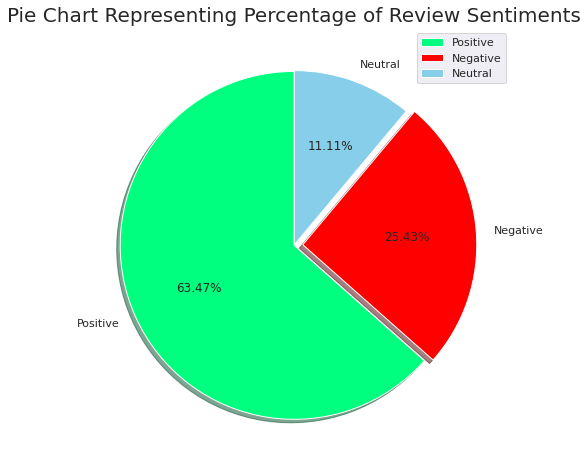

In [122]:
# visualization
plt.figure(figsize=(15,8))
colors = ['#00FF7F','red','skyblue']
explode=[0, 0.05, 0.005]
plt.pie(sentiment_counts, explode=explode, labels=sentiment_lebels, colors=colors, autopct='%.2f%%',shadow=True, startangle = 90)
plt.title('Pie Chart Representing Percentage of Review Sentiments', size = 20)
plt.legend()

### Distribution of Sentiment Polarity

Text(0.5, 1.0, 'Distribution of Polarity')

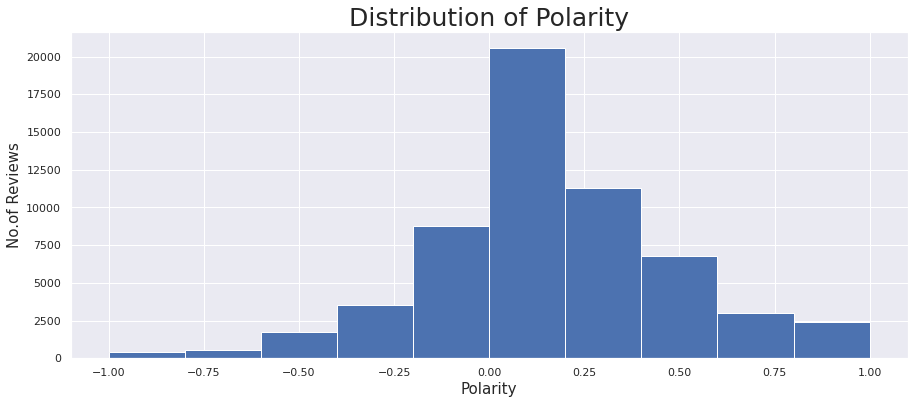

In [123]:
#visualization
plt.hist(app_review_df.loc[~app_review_df['Sentiment_Polarity'].isnull(), 'Sentiment_Polarity'])
plt.xlabel('Polarity',fontsize=15)
plt.ylabel('No.of Reviews',fontsize=15)
plt.title('Distribution of Polarity',size = 25)

### Polarity Vs Subjectivity(Does sentiment_subjectivity proportional to sentiment_polarity)

Text(0.5, 1.0, 'Polarity vs Subjectivity')

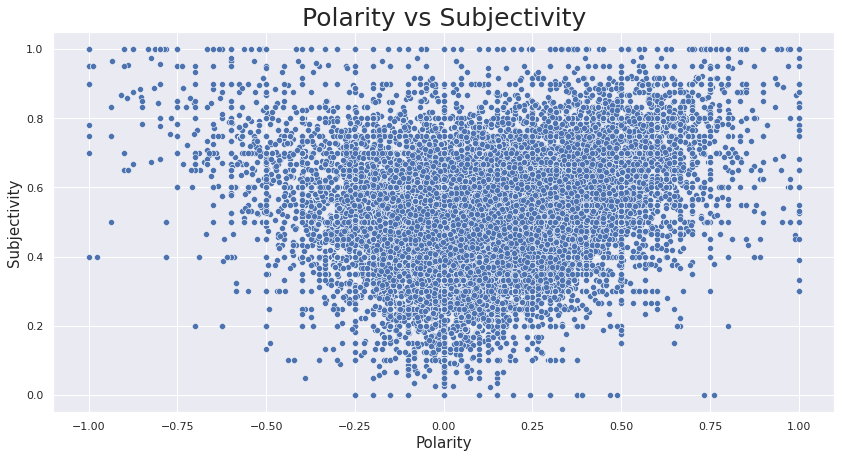

In [124]:
#visualization
plt.figure(figsize=(14,7))
polarity = app_review_df.loc[~app_review_df['Sentiment_Polarity'].isnull(), 'Sentiment_Polarity']
subjectivity = app_review_df.loc[~app_review_df['Sentiment_Subjectivity'].isnull(), 'Sentiment_Subjectivity']

sns.scatterplot(x = polarity, y = subjectivity)

plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)
plt.title('Polarity vs Subjectivity', fontsize=25)

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in some number of case Sentiment Subjectivity proportional to Sentiment Polarity

In [125]:
#Sentiment Subjectivity proportional to Sentiment Polarity
app_review_df.loc[app_review_df['Sentiment_Polarity'] == app_review_df['Sentiment_Subjectivity'], ['Sentiment_Polarity', 'Sentiment_Subjectivity']]

,Sentiment_Polarity,Sentiment_Subjectivity
2,0.0,0.0
7,0.0,0.0
16,0.5,0.5
19,0.5,0.5
27,1.0,1.0
...,...,...
100190,0.0,0.0
100193,0.0,0.0
100197,0.2,0.2
100216,0.2,0.2


In [126]:
#Sentiment Subjectivity is not proportional to Sentiment Polarity
app_review_df.loc[app_review_df['Sentiment_Polarity'] != app_review_df['Sentiment_Subjectivity'], ['Sentiment_Polarity', 'Sentiment_Subjectivity']].dropna()

,Sentiment_Polarity,Sentiment_Subjectivity
0,-0.250000,1.000000
1,-0.725000,0.833333
4,0.500000,0.600000
5,-0.800000,0.900000
8,0.500000,1.000000
...,...,...
100194,0.300000,0.100000
100200,0.000000,0.500000
100203,0.475000,0.512500
100209,0.566667,0.733333


### Which are the Apps with highest number of reviews

In [127]:
#top ten app with highest number of reviews
highest_app_reviews = app_review_df.groupby('App')['Translated_Review'].count().sort_values(ascending=False).reset_index().head(10)

In [128]:
highest_app_reviews.rename(columns={'Translated_Review':'No_of_Review'}, inplace=True)

In [129]:
highest_app_reviews

,App,No_of_Review
0,Helix Jump,1638
1,Bowmasters,1560
2,8 Ball Pool,1533
3,Angry Birds Classic,1365
4,Candy Crush Saga,1200
5,Duolingo: Learn Languages Free,1200
6,Bubble Shooter,870
7,Google Photos,764
8,Calorie Counter - MyFitnessPal,762
9,Garena Free Fire,666


Text(0.5, 1.0, 'App Vs Review')

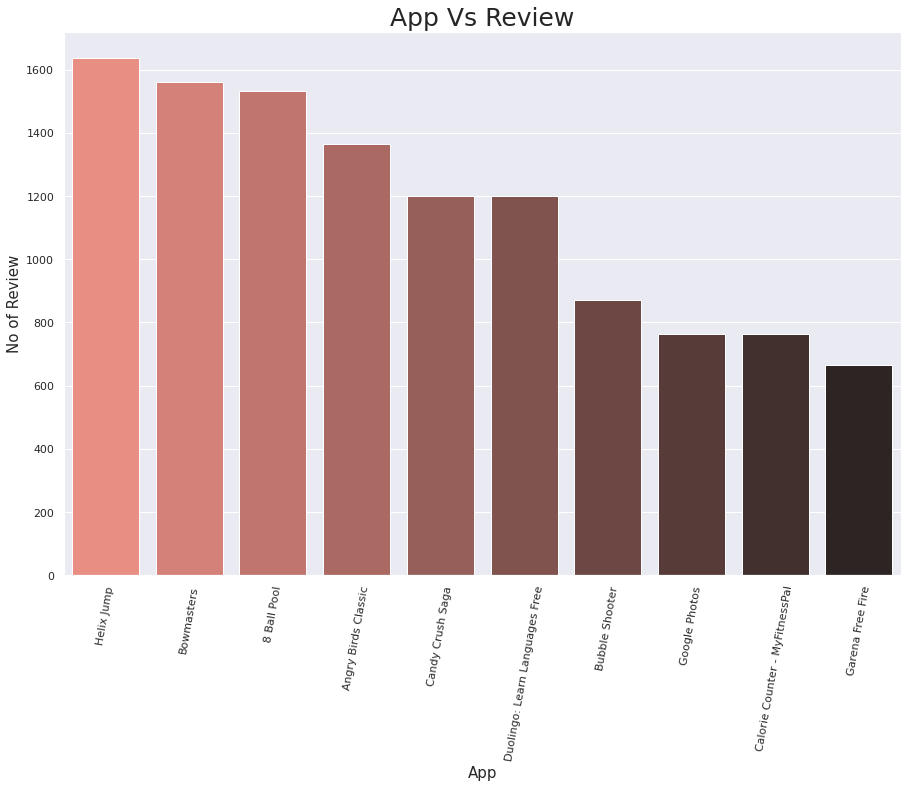

In [130]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=highest_app_reviews['App'], y=highest_app_reviews['No_of_Review'], palette= "dark:salmon_r")
plt.xticks(rotation=80)
plt.xlabel("App",fontsize=15)
plt.ylabel("No of Review", fontsize=15)
plt.title("App Vs Review", fontsize=25)